**Importing necessary libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler,LabelEncoder,RobustScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization

import warnings
warnings.filterwarnings('ignore')

**Read the dataset**

In [3]:
data=pd.read_csv("/kaggle/input/loan-approval-classification-data/loan_data.csv")
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


**EDA Data**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [5]:
data['person_age']=data['person_age'].astype('int')

In [6]:
data.person_age.dtypes

dtype('int64')

In [7]:
data.describe().round(2)

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00,45000.00
mean,27.76,80319.05,5.41,9583.16,11.01,0.14,5.87,632.61,0.22
std,6.05,80422.50,6.06,6314.89,2.98,0.09,3.88,50.44,0.42
min,20.00,8000.00,0.00,500.00,5.42,0.00,2.00,390.00,0.00
25%,24.00,47204.00,1.00,5000.00,8.59,0.07,3.00,601.00,0.00
50%,26.00,67048.00,4.00,8000.00,11.01,0.12,4.00,640.00,0.00
75%,30.00,95789.25,8.00,12237.25,12.99,0.19,8.00,670.00,0.00
max,144.00,7200766.00,125.00,35000.00,20.00,0.66,30.00,850.00,1.00


In [8]:
data.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [9]:
data.duplicated().sum()

0

**Analysis For Data**

In [10]:
pd.crosstab(data.person_gender,data.loan_status)

loan_status,0,1
person_gender,,
female,15674,4485
male,19326,5515


<Axes: xlabel='person_gender'>

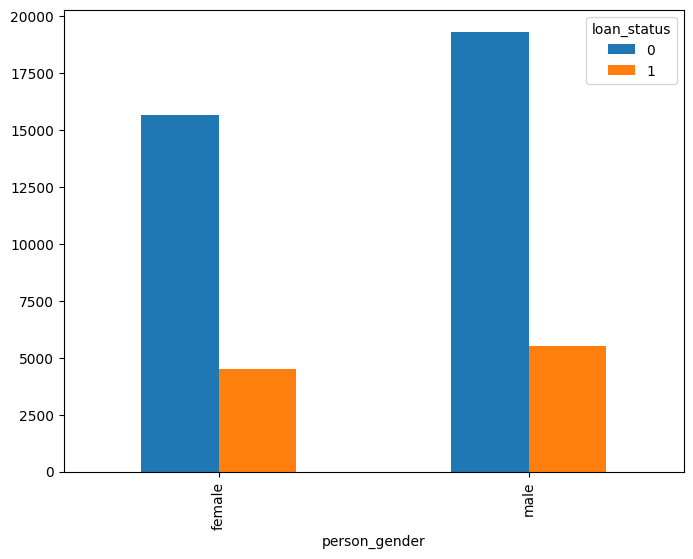

In [11]:
pd.crosstab(data.person_gender,data.loan_status).plot(kind='bar',figsize=(8,6))

In [12]:
pd.crosstab(data.person_home_ownership,data.loan_status)

loan_status,0,1
person_home_ownership,,
MORTGAGE,16345,2144
OTHER,78,39
OWN,2729,222
RENT,15848,7595


<Axes: xlabel='person_home_ownership'>

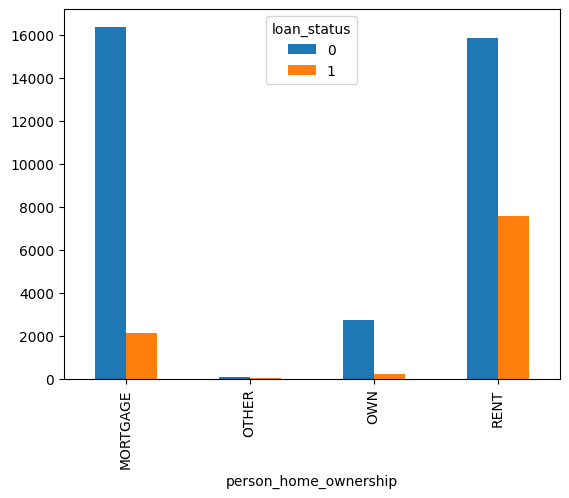

In [13]:
pd.crosstab(data.person_home_ownership, data.loan_status).plot(kind='bar')

In [14]:
data.groupby('loan_status')['person_age'].mean()

loan_status
0    27.833571
1    27.521300
Name: person_age, dtype: float64

<Axes: xlabel='loan_status'>

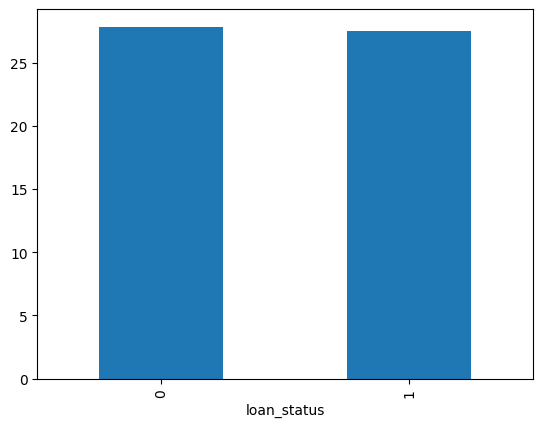

In [15]:
data.groupby('loan_status')['person_age'].mean().plot(kind='bar')

In [16]:
data.groupby('loan_status')['person_income'].mean()

loan_status
0    86157.040743
1    59886.096900
Name: person_income, dtype: float64

<Axes: xlabel='loan_status'>

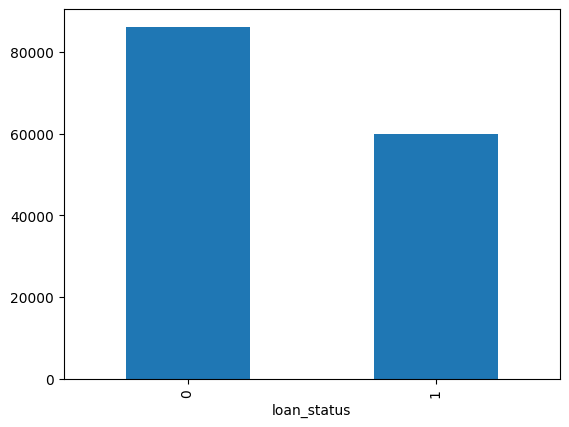

In [17]:
data.groupby('loan_status')['person_income'].mean().plot(kind='bar')

In [18]:
pd.crosstab(data.previous_loan_defaults_on_file,data.loan_status)

loan_status,0,1
previous_loan_defaults_on_file,,
No,12142,10000
Yes,22858,0


<Axes: xlabel='previous_loan_defaults_on_file'>

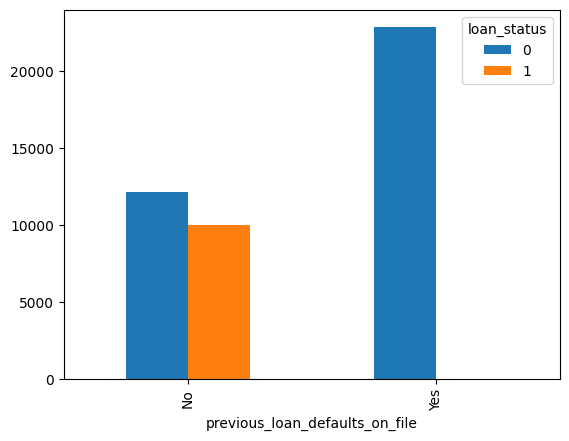

In [19]:
pd.crosstab(data.previous_loan_defaults_on_file,data.loan_status).plot(kind='bar')

In [20]:
pd.crosstab(data.loan_intent,data.loan_status)

loan_status,0,1
loan_intent,,
DEBTCONSOLIDATION,4982,2163
EDUCATION,7601,1552
HOMEIMPROVEMENT,3525,1258
MEDICAL,6170,2378
PERSONAL,6031,1521
VENTURE,6691,1128


<Axes: xlabel='loan_intent'>

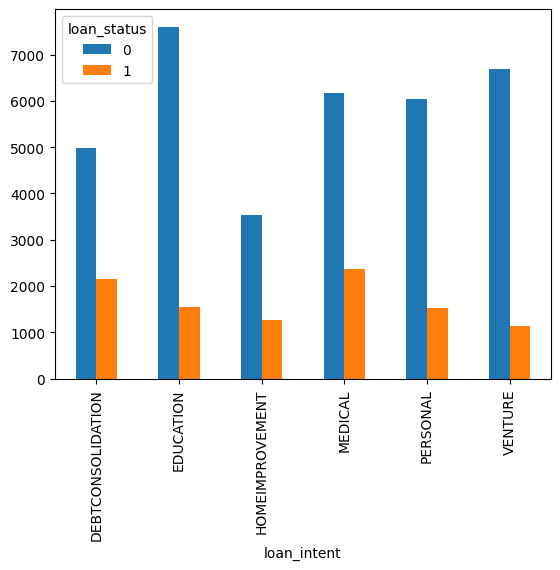

In [21]:
pd.crosstab(data.loan_intent,data.loan_status).plot(kind='bar')

In [22]:
data.corr(numeric_only=True)

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
person_age,1.000000,0.193698,0.954412,0.050750,0.013402,-0.043299,0.861985,0.178432,-0.021476
person_income,0.193698,1.000000,0.185987,0.242290,0.001510,-0.234177,0.124316,0.035919,-0.135808
person_emp_exp,0.954412,0.185987,1.000000,0.044589,0.016631,-0.039862,0.824272,0.186196,-0.020481
loan_amnt,0.050750,0.242290,0.044589,1.000000,0.146093,0.593011,0.042969,0.009074,0.107714
loan_int_rate,0.013402,0.001510,0.016631,0.146093,1.000000,0.125209,0.018008,0.011498,0.332005
loan_percent_income,-0.043299,-0.234177,-0.039862,0.593011,0.125209,1.000000,-0.031868,-0.011483,0.384880
cb_person_cred_hist_length,0.861985,0.124316,0.824272,0.042969,0.018008,-0.031868,1.000000,0.155204,-0.014851
credit_score,0.178432,0.035919,0.186196,0.009074,0.011498,-0.011483,0.155204,1.000000,-0.007647
loan_status,-0.021476,-0.135808,-0.020481,0.107714,0.332005,0.384880,-0.014851,-0.007647,1.000000


<Axes: >

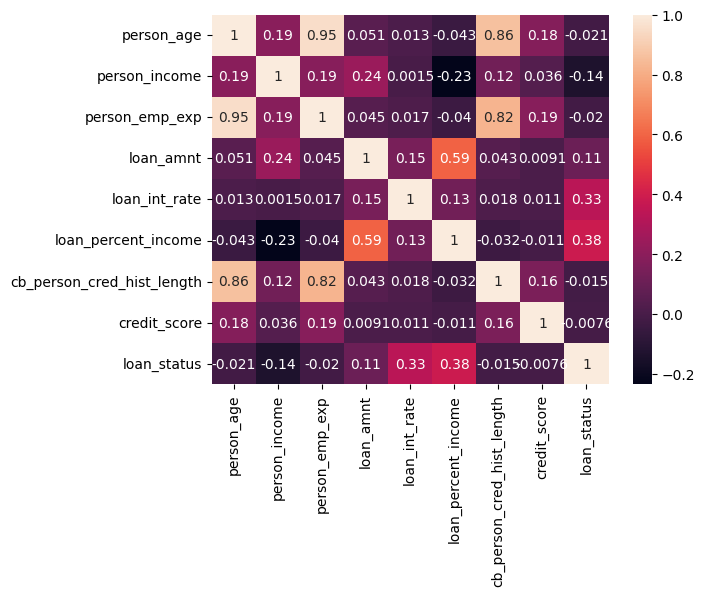

In [23]:
sns.heatmap(data.corr(numeric_only=True),annot=True)

**Check Outliers**

In [24]:
for feature in data.select_dtypes(include=['number']):
  Q1=data[feature].quantile(0.25)
  Q3=data[feature].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR

  if data[(data[feature]<lower_bound) | (data[feature]>upper_bound)].any().any():
    print(f"{feature} Yes")
  else:
    print(f"{feature} No")

person_age Yes
person_income Yes
person_emp_exp Yes
loan_amnt Yes
loan_int_rate Yes
loan_percent_income Yes
cb_person_cred_hist_length Yes
credit_score Yes
loan_status Yes


In [25]:
for feature in ['person_age','person_income','person_emp_exp','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length','credit_score']:
  Q1=data[feature].quantile(0.25)
  Q3=data[feature].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR

  data=data[(data[feature]>=lower_bound) & (data[feature]<=upper_bound)]


In [26]:
data.describe().round(2)

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,36065.00,36065.00,36065.00,36065.00,36065.00,36065.00,36065.00,36065.00,36065.0
mean,26.40,70058.80,4.07,8276.25,10.88,0.13,5.00,632.10,0.2
std,3.87,31562.84,3.88,4782.25,2.93,0.07,2.65,47.68,0.4
min,20.00,8000.00,0.00,500.00,5.42,0.01,2.00,497.00,0.0
25%,23.00,46458.00,1.00,4800.00,8.49,0.07,3.00,601.00,0.0
50%,25.00,64796.00,3.00,7350.00,11.01,0.12,4.00,638.00,0.0
75%,29.00,88578.00,6.00,11026.00,12.91,0.18,7.00,668.00,0.0
max,39.00,166754.00,16.00,22500.00,19.69,0.32,13.00,762.00,1.0


In [27]:
categorical_feature=data.select_dtypes(include=['object'])
categorical_feature

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
1,female,High School,OWN,EDUCATION,Yes
5,female,High School,OWN,VENTURE,No
9,female,High School,OWN,VENTURE,No
19,female,Master,MORTGAGE,EDUCATION,No
23,female,Bachelor,OWN,PERSONAL,Yes
...,...,...,...,...,...
44990,male,Master,RENT,PERSONAL,No
44993,female,High School,RENT,PERSONAL,No
44995,male,Associate,RENT,MEDICAL,No
44997,male,Associate,RENT,DEBTCONSOLIDATION,No


**Encoder**

In [28]:
le=LabelEncoder()
for column in categorical_feature:
  data[column]=le.fit_transform(data[column])


**Train Test Split**

In [29]:
x=data.drop(columns=['loan_status'],axis=1)
y=data.loan_status

**Scaler**

In [30]:
scaler=RobustScaler()
x=scaler.fit_transform(x)

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

**LogisticRegression Model**

In [32]:
model_lg=LogisticRegression()
model_lg.fit(x_train,y_train)

LogisticRegression()

In [33]:
y_predict_lg=model_lg.predict(x_test)
accuracy_score(y_test,y_predict_lg)

0.8860390960765285

In [34]:
print(classification_report(y_test,y_predict_lg))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      5755
           1       0.73      0.69      0.71      1458

    accuracy                           0.89      7213
   macro avg       0.83      0.81      0.82      7213
weighted avg       0.88      0.89      0.88      7213



<Axes: >

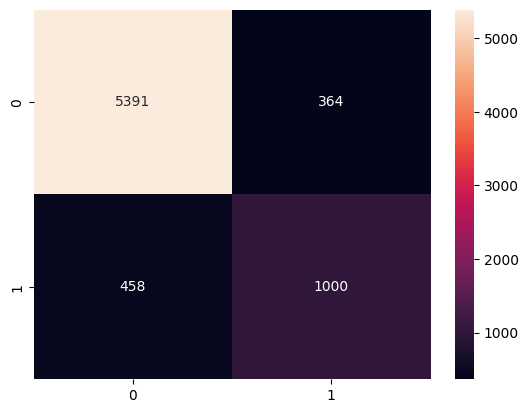

In [35]:
cm=confusion_matrix(y_test,y_predict_lg)
sns.heatmap(cm,annot=True,fmt='d')

**DecisionTreeClassifier Model**

In [36]:
model_dt=DecisionTreeClassifier()
model_dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [37]:
y_predict_dt=model_dt.predict(x_test)
accuracy_score(y_test,y_predict_dt)

0.8953278802162762

In [38]:
print(classification_report(y_test,y_predict_dt))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      5755
           1       0.73      0.77      0.75      1458

    accuracy                           0.90      7213
   macro avg       0.83      0.85      0.84      7213
weighted avg       0.90      0.90      0.90      7213



<Axes: >

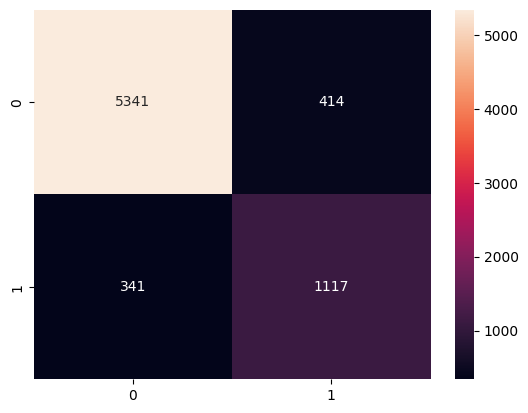

In [39]:
cm=confusion_matrix(y_test,y_predict_dt)
sns.heatmap(cm,annot=True,fmt='d')

**RandomForestClassifier Model**

In [40]:
model_rf=RandomForestClassifier()
model_rf.fit(x_train,y_train)

RandomForestClassifier()

In [41]:
y_predict_rf=model_rf.predict(x_test)
accuracy_score(y_test,y_predict_rf)

0.924164702620269

In [42]:
print(classification_report(y_test,y_predict_rf))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      5755
           1       0.86      0.74      0.80      1458

    accuracy                           0.92      7213
   macro avg       0.90      0.86      0.88      7213
weighted avg       0.92      0.92      0.92      7213



<Axes: >

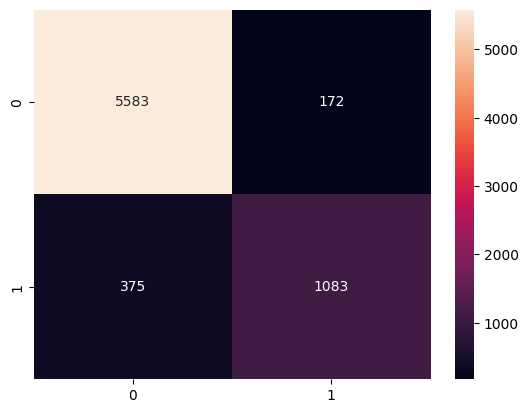

In [43]:
cm=confusion_matrix(y_test,y_predict_rf)
sns.heatmap(cm,annot=True,fmt='d')

**XGBClassifier Model**

In [44]:
model_xg=XGBClassifier(objective='binary:logistic')
model_xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [45]:
y_predict_xg=model_xg.predict(x_test)
accuracy_score(y_test,y_predict_xg)

0.9299875225287675

In [46]:
print(classification_report(y_test,y_predict_xg))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      5755
           1       0.86      0.78      0.82      1458

    accuracy                           0.93      7213
   macro avg       0.90      0.87      0.89      7213
weighted avg       0.93      0.93      0.93      7213



<Axes: >

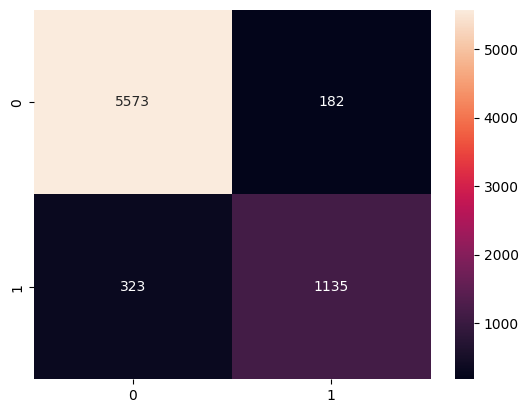

In [47]:
cm=confusion_matrix(y_test,y_predict_xg)
sns.heatmap(cm,annot=True,fmt='d')

**SVC Model**

In [48]:
model_sv=SVC()
model_sv.fit(x_train,y_train)

SVC()

In [49]:
y_predict_sv=model_sv.predict(x_test)
accuracy_score(y_test,y_predict_sv)

0.9044780257867738

In [50]:
print(classification_report(y_test,y_predict_sv))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      5755
           1       0.80      0.70      0.75      1458

    accuracy                           0.90      7213
   macro avg       0.86      0.83      0.84      7213
weighted avg       0.90      0.90      0.90      7213



<Axes: >

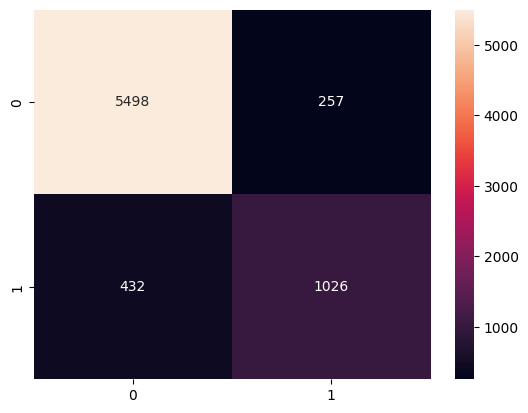

In [51]:
cm=confusion_matrix(y_test,y_predict_sv)
sns.heatmap(cm,annot=True,fmt='d')

**GridSearchCV**

In [52]:
models = {
    'SVC': SVC(),
    'RandomForest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(objective='binary:logistic'),
    'LogisticRegression': LogisticRegression()
}

In [53]:
param_grid=[
  {
    'model':[SVC()],
    'model__C':[0.1,1,10,100],
    'model__kernel':['linear','rbf','poly'],
    'model__gamma':['scale','auto']
  },

  {
      'model':[RandomForestClassifier()],
      'model__n_estimators':[50,100,200],
      'model__max_depth':[None,10,20,30],
  },

  {
      'model':[XGBClassifier(objective='binary:logistic')],
      'model__n_estimators':[10,100,200],
      'model__max_depth':[None,10,20,30],
  },

  {
      'model':[LogisticRegression()],
      'model__C':[0.1,1,10,100],
  }

]

In [54]:
pipeline=Pipeline([
    ('model',SVC())
])

In [55]:
grid=GridSearchCV(pipeline,param_grid,cv=5,scoring='f1',n_jobs=-1)

In [56]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('model', SVC())]), n_jobs=-1,
             param_grid=[{'model': [SVC()], 'model__C': [0.1, 1, 10, 100],
                          'model__gamma': ['scale', 'auto'],
                          'model__kernel': ['linear', 'rbf', 'poly']},
                         {'model': [RandomForestClassifier()],
                          'model__max_depth': [None, 10, 20, 30],
                          'model__n_estimators': [50, 100, 200]},
                         {'model': [XGBClassifier(base_score=None, boo...
                                                  max_cat_to_onehot=None,
                                                  max_delta_step=None,
                                                  max_depth=10, max_leaves=None,
                                                  min_child_weight=None,
                                                  missing=nan,
                                                  monotone_constraints=None,
                                                  multi_strategy=None,
                                                  n_estimators=100, n_jobs=None,
                                                  num_parallel_tree=None,
                                                  random_state=None, ...)],
                          'model__max_depth': [None, 10, 20, 30],
                          'model__n_estimators': [10, 100, 200]},
                         {'model': [LogisticRegression()],
                          'model__C': [0.1, 1, 10, 100]}],
             scoring='f1')

In [57]:
best_model=grid.best_estimator_

In [58]:
print("Best model",best_model)
print("Best score",grid.best_score_)
print("Best parameters",grid.best_params_)

Best model Pipeline(steps=[('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=10, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estim

In [59]:
def predicet_best_model(new_data):
  prediction=best_model.predict(new_data)
  return prediction

In [60]:
y_pred_grid=predicet_best_model(x_test)
print(classification_report(y_test,y_pred_grid))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      5755
           1       0.84      0.78      0.81      1458

    accuracy                           0.93      7213
   macro avg       0.90      0.87      0.88      7213
weighted avg       0.93      0.93      0.93      7213



**ANN Model**

In [63]:
model = Sequential([
    Dense(64, activation='relu', input_dim=13),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  
])

In [71]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [72]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,969 (15.50 KB)

 Trainable params: 3,745 (14.63 KB)

 Non-trainable params: 224 (896.00 B)

In [73]:
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2)


Epoch 1/50
722/722 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7493 - loss: 0.5143 - val_accuracy: 0.8993 - val_loss: 0.2347
Epoch 2/50
722/722 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8765 - loss: 0.2774 - val_accuracy: 0.9021 - val_loss: 0.2242
Epoch 3/50
722/722 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8800 - loss: 0.2607 - val_accuracy: 0.9049 - val_loss: 0.2183
Epoch 4/50
722/722 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8855 - loss: 0.2428 - val_accuracy: 0.9042 - val_loss: 0.2124
Epoch 5/50
722/722 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8898 - loss: 0.2451 - val_accuracy: 0.9038 - val_loss: 0.2117
Epoch 6/50
722/722 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8927 - loss: 0.2327 - val_accuracy: 0.9054 - val_loss: 0.2123
Epoch 7/50
722/722 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8992 - loss: 0.2265 - val_accuracy: 0.9045 - val_loss: 0.2098
Epoch 8/50
722/722 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8887 - loss: 0.2348 - val_accuracy: 0